## Problem Statement

### Background

Diabetes is a chronic disease that affects millions of people worldwide. Early detection and management of diabetes can significantly improve the quality of life for patients and reduce the risk of severe complications such as heart disease, stroke, kidney failure, and blindness. Machine learning techniques can play a crucial role in predicting the onset of diabetes, allowing for timely intervention and treatment.

### Objective

The objective of this project is to develop a machine learning model that can accurately predict whether a person has diabetes based on specific health measurements and lifestyle factors. This will involve:

1. **Data Preprocessing**: Cleaning and preparing the dataset for analysis.
2. **Exploratory Data Analysis (EDA)**: Understanding the distribution of the data and relationships between features.
3. **Model Training**: Implementing and training multiple machine learning algorithms to identify the best-performing model.
4. **Model Evaluation**: Comparing the performance of different models using accuracy metrics.
5. **Feature Importance**: Identifying the most important features that contribute to the prediction of diabetes.
6. **Prediction**: Creating a pipeline that allows for the prediction of diabetes in new patients based on their health data.


The target variable is **Outcome**, indicating whether the individual has diabetes (1) or not (0).

### Expected Outcome

By the end of this project, we aim to have a well-trained machine learning model capable of predicting diabetes with high accuracy. Additionally, the project will provide insights into the most significant factors contributing to diabetes, which can help in early detection and preventive measures.


### Column information

The dataset used for this project contains health measurements and lifestyle factors for a group of individuals. The features include:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skinfold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age in years

In [35]:
## Importing Liabraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [37]:
# Load the dataset
df = pd.read_csv("diabetesdataset.csv")

# Display the first few rows
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [40]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 768
Number of Columns 10


In [10]:
df.isna().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

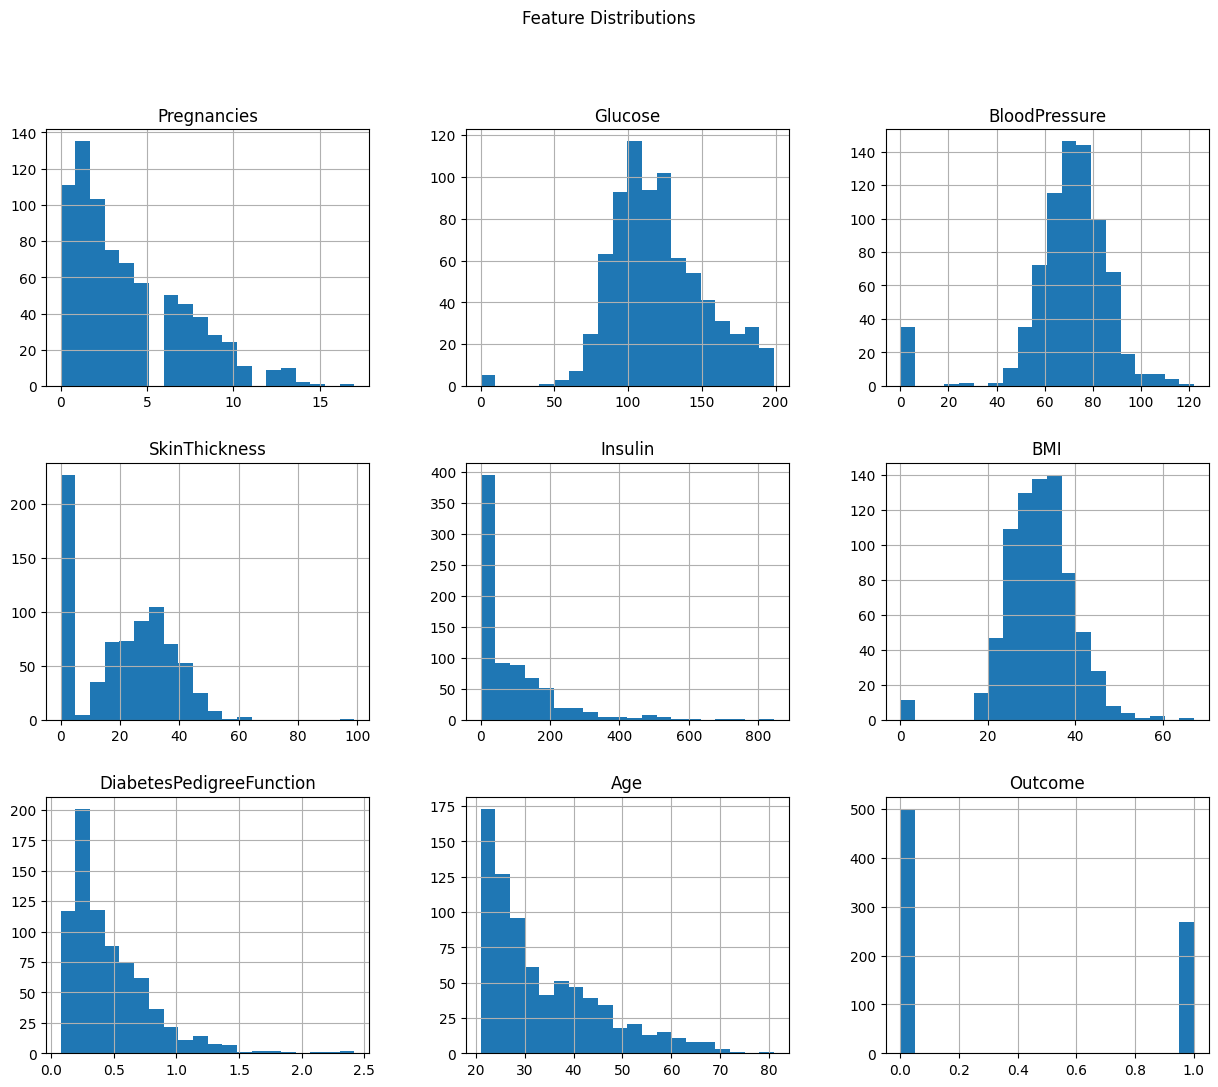

In [60]:
# Visualize the distribution of each feature
df.hist(bins=20, figsize=(15,12))
plt.suptitle("Feature Distributions")
plt.show()

#### Feature Distributions

The feature distributions depicted in the histograms provide insights into the range and frequency of values for each feature in the diabetes dataset. Here are some key observations from the histograms:

1. **Pregnancies**:
   - The distribution is right-skewed, with most individuals having fewer pregnancies. A small number of individuals have higher pregnancy counts.

2. **Glucose**:
   - The glucose levels form a roughly normal distribution, with most values centered around the 100-150 range. Extreme low and high values are less common.

3. **BloodPressure**:
   - Blood pressure readings are also roughly normally distributed, with a peak around the 60-80 mm Hg range.

4. **SkinThickness**:
   - The skin thickness values show a right-skewed distribution, with many low values and fewer higher values.

5. **Insulin**:
   - The insulin levels are heavily right-skewed, with most values concentrated at the lower end and a long tail of higher values.

6. **BMI**:
   - BMI values show a roughly normal distribution, peaking around the 25-35 range.

7. **DiabetesPedigreeFunction**:
   - The diabetes pedigree function values are right-skewed, with most values clustered around 0.2 to 0.4 and fewer higher values.

8. **Age**:
   - Age shows a right-skewed distribution, with a higher frequency of younger individuals (around 20-30 years old) and a gradual decrease in frequency with increasing age.

9. **Outcome**:
   - The outcome variable is binary, with a significant imbalance. There are more non-diabetic cases (0) compared to diabetic cases (1).

#### Implications for Diabetes Prediction

The distributions provide essential context for understanding the dataset and preparing it for model training:

- **Skewed Distributions**: Several features, such as Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction, and Age, exhibit right-skewed distributions. This skewness may necessitate transformations or special handling during preprocessing to improve model performance.
  
- **Binary Outcome**: The imbalance in the Outcome variable highlights the need for techniques to handle imbalanced data, such as resampling methods or using metrics that account for class imbalance during model evaluation.

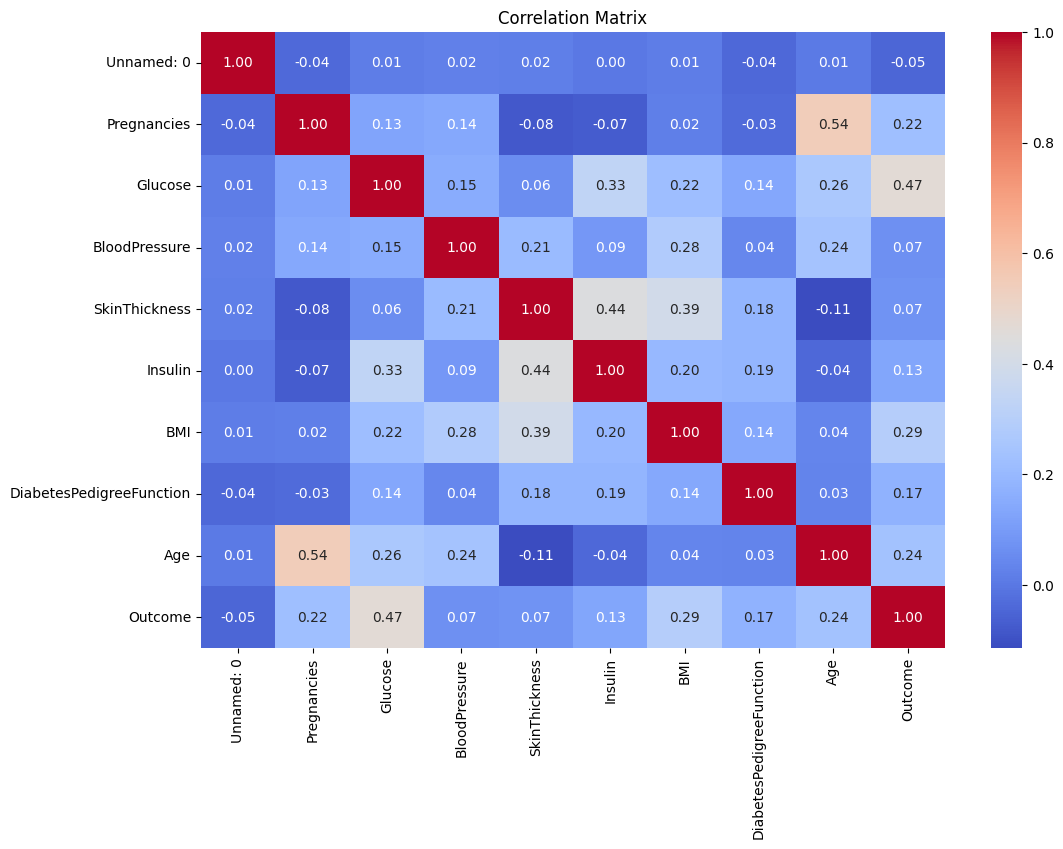

In [43]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#### Correlation Matrix Analysis

The correlation matrix shown in the above figure provides insights into the relationships between different features in the diabetes dataset. Here are some key observations from the matrix:

1. **High Positive Correlations**:
   - **Age and Pregnancies**: There is a notable positive correlation (0.54) between Age and Pregnancies, indicating that older individuals tend to have had more pregnancies.
   - **Glucose and Outcome**: Glucose levels have a significant positive correlation (0.47) with the Outcome variable, suggesting that higher glucose levels are associated with a higher likelihood of having diabetes.

2. **Moderate Positive Correlations**:
   - **BMI and Outcome**: BMI shows a moderate positive correlation (0.29) with the Outcome, indicating that higher BMI values are moderately associated with diabetes.
   - **Age and Outcome**: Age also has a moderate positive correlation (0.24) with the Outcome, implying that older individuals are more likely to have diabetes.
   - **Insulin and SkinThickness**: There is a moderate positive correlation (0.44) between Insulin levels and SkinThickness.

3. **Low Correlations**:
   - Most other features show low or negligible correlations with each other and with the Outcome variable. For instance, BloodPressure and Outcome have a low correlation (0.07), indicating a weak relationship.

4. **Negative Correlations**:
   - The matrix reveals a few weak negative correlations, such as between SkinThickness and Age (-0.11), but these values are relatively small and do not indicate strong negative relationships.

In [53]:
# Split the data into traing and testing
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,
                                               random_state=42)

In [19]:
# Define the pipelines for different classifiers
pipeline_lr  = Pipeline([('scalar1',StandardScaler()),
                         ('lr_classifier',LogisticRegression())])

pipeline_knn = Pipeline([('scalar2',StandardScaler()),
                          ('knn_classifier',KNeighborsClassifier())])

pipeline_svc = Pipeline([('scalar3',StandardScaler()),
                         ('svc_classifier',SVC())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(max_depth=3))])
pipeline_gbc = Pipeline([('gbc_classifier',GradientBoostingClassifier())])



In [20]:
pipelines = [pipeline_lr,
            pipeline_knn,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc]

In [21]:
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_classifier', LogisticRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()),
                 ('knn_classifier', KNeighborsClassifier())]),
 Pipeline(steps=[('scalar3', StandardScaler()), ('svc_classifier', SVC())]),
 Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier(max_depth=3))]),
 Pipeline(steps=[('gbc_classifier', GradientBoostingClassifier())])]

In [22]:
for pipe in pipelines:
    pipe.fit(xtrain,ytrain)

In [23]:
pipe_dict = {0:'LR',
             1:'KNN',
             2:'SVC',
             3:'DT',
             4: 'RF',
             5: 'GBC'}

In [45]:
# Evaluate each model on the test set and print the accuracy
test_accuracies = []
for i, model in enumerate(pipelines):
    accuracy = round(model.score(xtest, ytest) * 100, 2)
    test_accuracies.append(accuracy)
    print(f"{pipe_dict[i]} Test Accuracy: {accuracy}")

LR Test Accuracy: 75.32
KNN Test Accuracy: 69.48
SVC Test Accuracy: 73.38
DT Test Accuracy: 74.68
RF Test Accuracy: 77.27
GBC Test Accuracy: 74.03


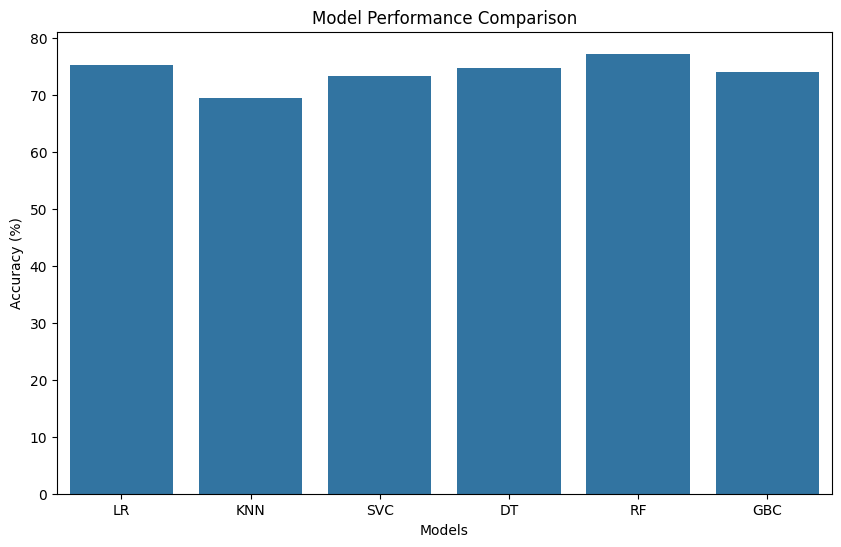

In [46]:
# model performance comparison 
plt.figure(figsize=(10, 6))
sns.barplot(x=list(pipe_dict.values()), y=test_accuracies)
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.show()


***From the above analysis, it is evident that the Random Forest classifier achieved the highest accuracy of 77%, making it the most robust model for this project.***

In [47]:
# Train a Random Forest classifier on the entire dataset
rf = RandomForestClassifier()
rf.fit(x, y)


RandomForestClassifier()

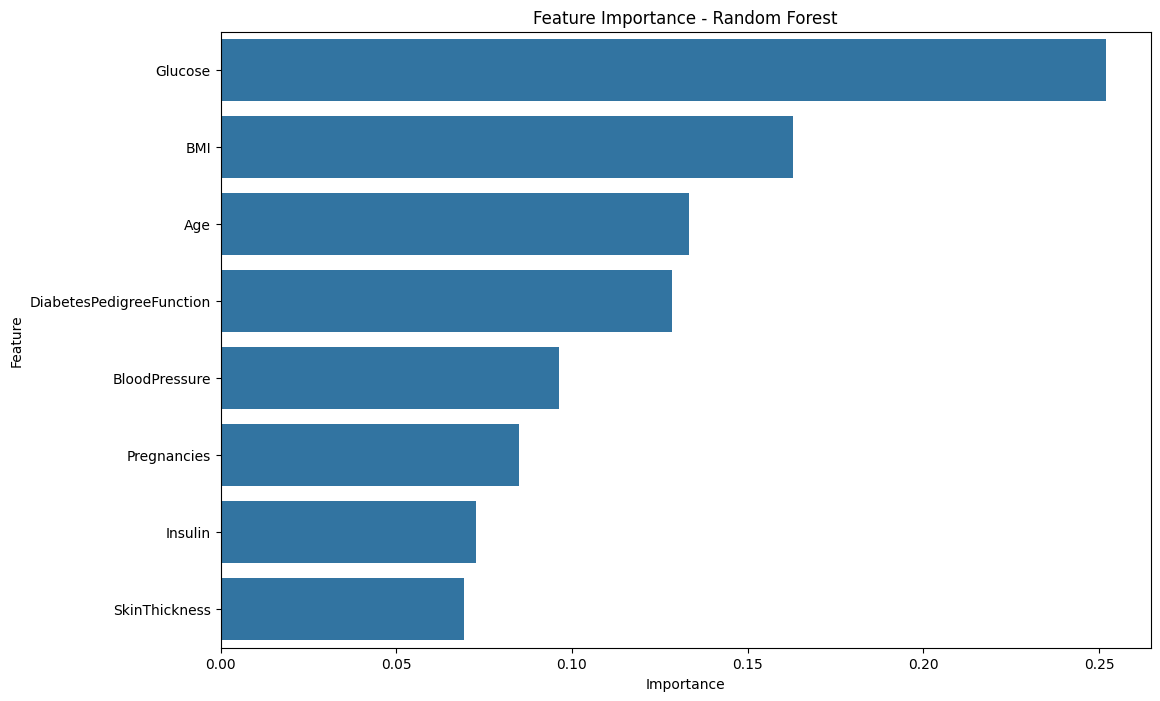

In [48]:
# Feature importance from Random Forest
feature_importance = rf.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.show()


In [49]:
new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':148.0,
    'BloodPressure':72.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,    
},index=[0])

In [50]:
res=rf.predict(new_data)

In [51]:
if res[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

diabetic


In [62]:
# saving the model and testing 
import joblib
joblib.dump(rf,"diabetes_prediction_model")

['diabetes_prediction_model']

In [64]:
model=joblib.load("diabetes_prediction_model")
model.predict(new_data)

array([1], dtype=int64)

### Conclusion 

***This project demonstrates the feasibility and effectiveness of using machine learning for diabetes prediction. By leveraging the power of data and advanced algorithms, we can contribute to better healthcare outcomes and empower individuals with valuable health insights.***

